<h1>Polynomial Regression</h1>
<p>
Trying to fit 2D curve to data using Gradient Descent Algorithm
    

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial.

Although polynomial regression fits a **nonlinear model** to the data but estimation problem is still **"linear"**, in the sense that the regression function h(y. x) is linear in the unknown parameters that are estimated from the data.
    

<h2> Polynomial Hypothesis</h2>

<p>
$h(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5 + w_6 x^6 + w_7 x^7 + w_8 x^8$
</p> 

<h3> Gradient Descent Algorithm </h3>
<p>
We start with assumpution equation of degree 8 (Called hypothesis) which can fit above data points.   
<p>
$h(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5 + w_6 x^6 + w_7 x^7 + w_8 x^8$
</p> 
The two coefficients with initial guess (i.e. $w_0$, $w_1$...$w_n$) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.

<p>
 Our objective is to minimize Loss.
    <p>
 $ L(W)=   \hat{Y}-Y$  Where  $\hat{Y}=h(X)$
 </p>
Since Loss can negative or postive, we need to minimize the absolute values ( OR Mean squared) Loss so we define Loss/Cost function as follows

<h2>Cost/Loss Function</h2>
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$L(W) = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left ( \hat{Y}_{i}- Y_{i} \right)^2$
<p>
$L(w_0, w_1,...w_n)  = \dfrac {1}{2n} \displaystyle \sum _{i=1}^n \left (h(x_{i}) - y_{i} \right)^2$

This Loss/cost function is also called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$  term.

We minimize Loss by taking the derivative (the tangential line to a function) of our cost/loss function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost/loss function in the direction with the steepest descent. The size of each step is determined by the parameter α($alpha$), which is called the learning rate. The direction in which the step is taken is determined by the partial derivative of $L(w_0,w_1,..,w_n)$. 

The gradient descent algorithm is:

repeat until convergence:<p>
{<p>
&nbsp;&nbsp;    $w_0 := w_0 - \alpha \frac{\partial}{\partial w_0} L(w_0, w_1,....,w_n) $<p>
&nbsp;&nbsp;    $w_1 := w_1 - \alpha \frac{\partial}{\partial w_1} L(w_0, w_1,....,w_n) $<p>
&nbsp;&nbsp;    ......<p>
&nbsp;&nbsp;    $w_n := w_n - \alpha \frac{\partial}{\partial w_n} L(w_0, w_n,....,w_n) $<p>
}


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset
dfTest = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')   #Test Dataset
dfValid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv') #Validation Dataset
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

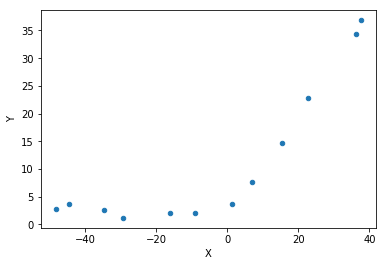

In [3]:
dfTrain.plot(x='X',y='Y',kind='scatter')

<h2>Extract Input Feature to <b>X </b>and Label to <b>y</b>

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:1]
    df_Label=df.iloc[:,1:2]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)

<H5>Improve RMSE by adding polynomial features and Normalizing Input Data</h5>
    <p> Try without Normalization, you will find it difficult to train and converge.

<h5>Normalize Input
    </h2>
    

In [6]:
SMean=np.mean(X)
SDev=np.std(X)
def NormalizeInput(X,SMean,SDev):   
    XNorm=(X-SMean)/SDev
    return XNorm

In [7]:
XNorm=NormalizeInput(X,SMean,SDev)

<h5>Add Polynomial Features
    </h2>

In [8]:
def mapFeature(X,degree):
    
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1
    out=np.ones((X.shape[0],sz))     #Adding Bias W0

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    
    return out

In [9]:
degree=8
inputX=mapFeature(XNorm,degree)  

<h1> Training

<h5> Initialization

In [10]:
batchSize=len(Y)         #no of Examples
iterations = 1000
alpha = 0.01
featureCount=inputX.shape[1] 
weights=np.zeros((featureCount, 1)) #initialize Weight Paramters
lossList=np.zeros((iterations,1),dtype=float)  #for plotting loss curve

<h5> Gradient Descent Updates

In [11]:

for k in range(iterations):
    #Hypothesis
    hypothesis=np.matmul( inputX,weights)           
    
    #Loss
    loss=hypothesis-Y  
    
    
    # derivative
    dW=np.matmul(inputX.T,loss)  #Derivative
   
    #gradient Update
    weights=weights - (alpha/batchSize)*dW              
    
    #Compute Loss for Plotting
    newLoss=np.matmul( inputX,weights)-Y
    newLossSqr=np.multiply(newLoss,newLoss)
    lossList[k]=(1.0/(2.0*batchSize))* np.sum(newLossSqr)


<h1>Plot Loss Curve

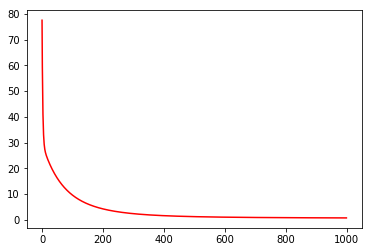

In [12]:
plt.plot(lossList,color='r')

<h1> Prediction/RMSE Evaluation

In [13]:
def predict(X,weights,SMean,SDev,degree):
    XNorm=NormalizeInput(X,SMean,SDev)
    inputX=mapFeature(XNorm,degree)
    PY=np.matmul(inputX, weights)
    return PY

In [14]:
def getRMSE(aY,pY):
    Error=aY- pY
    ErrorSqr=Error**2
    MSE=ErrorSqr.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

<h5>RMSE on Training Data

In [15]:
X,Y=extractFeatures(dfTrain)
pY=predict(X, weights,SMean,SDev,degree)  # Predict with bias feature added
print(getRMSE(Y, pY))

1.1512790310832992


<h5> RMSE on Validation Data

In [16]:
vX,vY=extractFeatures(dfValid)
pY=predict(vX, weights,SMean,SDev,degree)  # Predict with bias feature added
print(getRMSE(vY, pY))

15.963319788428421


<h5> RMSE on Test Data

In [17]:
tX,tY=extractFeatures(dfTest)
pY=predict(tX, weights,SMean,SDev,degree)  # Predict with bias feature added
print(getRMSE(tY, pY))

12.331696932887116


<h1>Plot Hypothesis

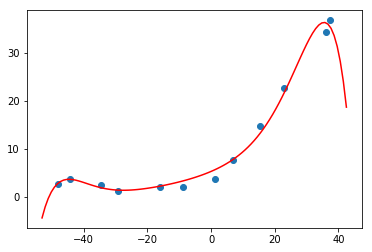

In [18]:
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
curveX = np.linspace(x_min, x_max, 100)
curveX.shape=(len(curveX),1) 
curveY=predict(curveX, weights,SMean,SDev,degree)  # Predict with bias feature added
plt.scatter(X,Y)
plt.plot(curveX, curveY,color='r')